### 1. Setup

In [1]:
# Python ≥3.5 dibutuhkan
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 dibutuhkan
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version hanya ada di Colab.
    # Baris ini dikomentari karena tidak relevan di lingkungan .py biasa
    # %tensorflow_version 2.x
    pass
except Exception:
    pass

# TensorFlow ≥2.0 dibutuhkan
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Import umum
import numpy as np
import os

# untuk membuat output notebook ini stabil di berbagai run
np.random.seed(42)

# Untuk memplot figure yang cantik
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Tempat menyimpan figure
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Menyimpan figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2025-06-20 01:21:35.134640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750357295.160422   47737 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750357295.171314   47737 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-20 01:21:35.290376: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Perceptrons

In [2]:
# Catatan: kita mengatur max_iter dan tol secara eksplisit untuk menghindari peringatan tentang fakta bahwa
# nilai default-nya akan berubah di versi Scikit-Learn mendatang.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap # Diimpor di awal section untuk kerapian

iris = load_iris()
X = iris.data[:, (2, 3)]  # panjang petal, lebar petal
# Mengubah tipe data y menjadi int64 untuk kompatibilitas yang lebih baik
y = (iris.target == 0).astype(np.int64) 

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [3]:
# Memeriksa hasil prediksi y_pred
y_pred = per_clf.predict([[2, 0.5]])
print("\nHasil prediksi Perceptron untuk [2, 0.5]:", y_pred)


Hasil prediksi Perceptron untuk [2, 0.5]: [1]


Menyimpan figure perceptron_iris_plot


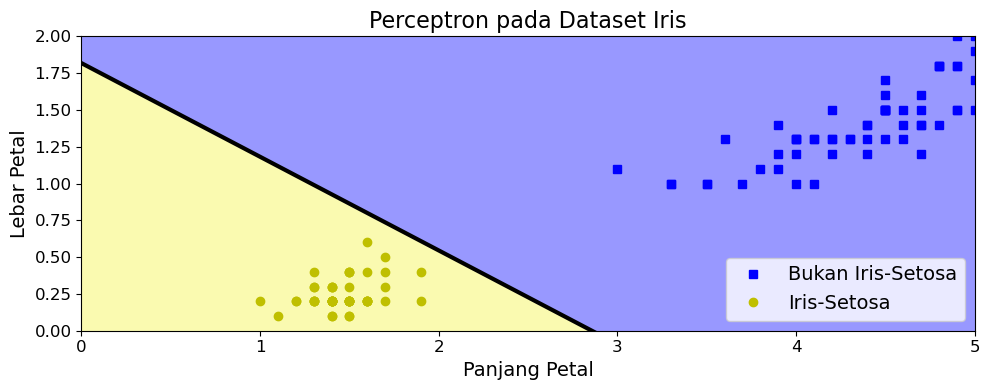

In [4]:
# Memplot batas keputusan Perceptron
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new_plot = np.c_[x0.ravel(), x1.ravel()]
y_predict_plot = per_clf.predict(X_new_plot)
zz = y_predict_plot.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Bukan Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Panjang Petal", fontsize=14)
plt.ylabel("Lebar Petal", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)
plt.title("Perceptron pada Dataset Iris", fontsize=16) # Menambahkan judul
save_fig("perceptron_iris_plot")
plt.show()

### 3. Fungsi Aktivasi (Activation functions)

In [5]:
# Mendefinisikan fungsi aktivasi sigmoid, ReLU, dan derivative.

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Menyimpan figure activation_functions_plot


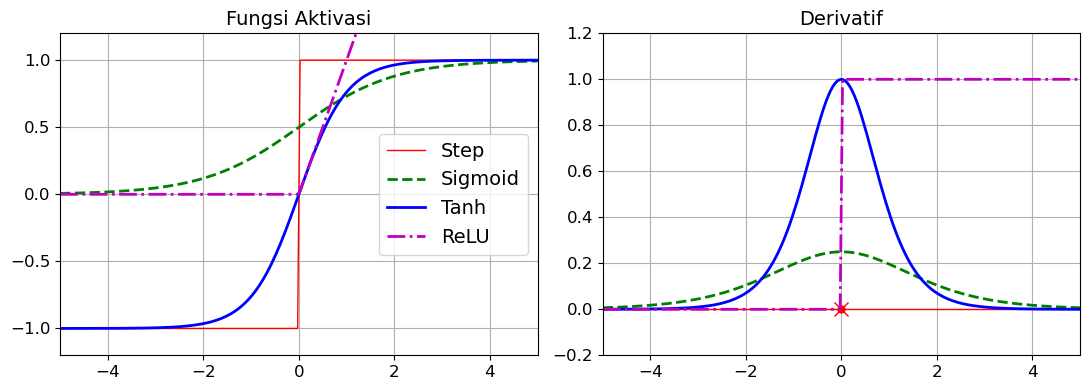

In [6]:
# Memplot fungsi aktivasi dan derivative-nya
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Fungsi Aktivasi", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
# plt.legend(loc="center right", fontsize=14) # Dikomentari karena tumpang tindih
plt.title("Derivatif", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
# Mendefinisikan fungsi heaviside dan mlp_xor
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

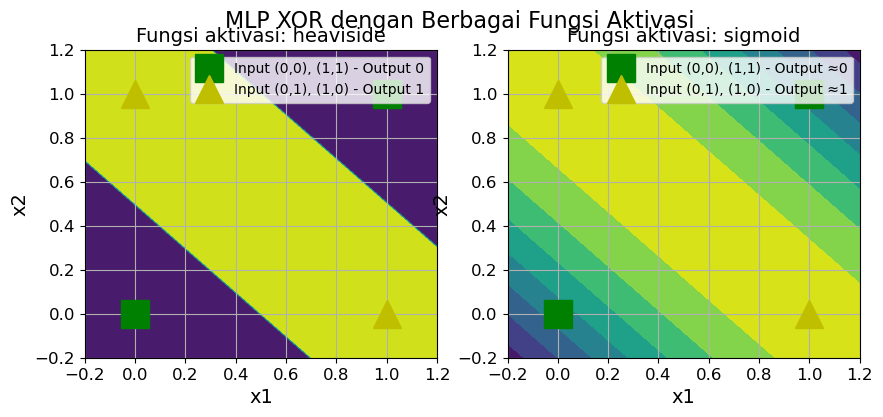

In [8]:
# Memplot hasil dari mlp_xor dengan fungsi aktivasi heaviside dan sigmoid
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20, label="Input (0,0), (1,1) - Output 0") # Menambah label
plt.plot([0, 1], [1, 0], "y^", markersize=20, label="Input (0,1), (1,0) - Output 1") # Menambah label
plt.title("Fungsi aktivasi: heaviside", fontsize=14)
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend() # Menampilkan legend

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20, label="Input (0,0), (1,1) - Output ≈0") # Menambah label
plt.plot([0, 1], [1, 0], "y^", markersize=20, label="Input (0,1), (1,0) - Output ≈1") # Menambah label
plt.title("Fungsi aktivasi: sigmoid", fontsize=14)
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend() # Menampilkan legend
plt.suptitle("MLP XOR dengan Berbagai Fungsi Aktivasi", fontsize=16) # Menambah judul utama
plt.show()

### 4. Membangun Pengklasifikasi Gambar (Building an Image Classifier)

In [ ]:
# Pertama, impor TensorFlow dan Keras.

import tensorflow as tf
from tensorflow import keras

print(f"\nVersi TensorFlow: {tf.__version__}")
print(f"Versi Keras: {keras.__version__}")


Versi TensorFlow: 2.18.0
Versi Keras: 3.9.2


In [10]:
# Mari kita mulai dengan memuat dataset Fashion MNIST. Keras memiliki beberapa fungsi untuk memuat dataset populer di keras.datasets.
# Dataset ini sudah dipisahkan untuk Anda antara training set dan test set, tetapi akan berguna
# untuk membagi training set lebih lanjut untuk memiliki validation set:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 60s 2us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 9s 2us/step


In [11]:
# Training set berisi 60.000 gambar skala abu-abu, masing-masing 28x28 piksel:
print(f"\nShape X_train_full: {X_train_full.shape}")


Shape X_train_full: (60000, 28, 28)


In [12]:
# Setiap intensitas piksel direpresentasikan sebagai byte (0 hingga 255):
print(f"Tipe data X_train_full: {X_train_full.dtype}")

Tipe data X_train_full: uint8


In [13]:
# Mari kita pisahkan full training set menjadi validation set dan training set (yang lebih kecil).
# Kita juga akan menskalakan intensitas piksel ke rentang 0-1 dan mengubahnya menjadi float, dengan membagi dengan 255.
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

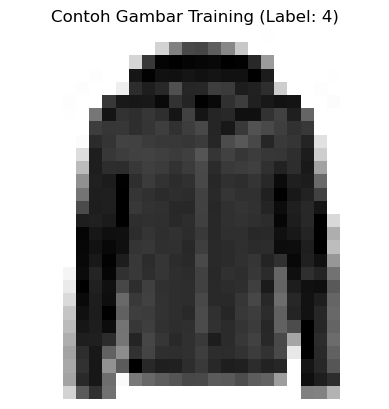

In [14]:
# Memplot gambar menggunakan fungsi imshow() Matplotlib, dengan color map 'binary':
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.title(f"Contoh Gambar Training (Label: {y_train[0]})") # Menambah judul
plt.show()

In [15]:
# Label adalah ID kelas (direpresentasikan sebagai uint8), dari 0 hingga 9:
print(f"Contoh label training: {y_train[:5]}")

Contoh label training: [4 0 7 9 9]


In [16]:
# Berikut adalah nama kelas yang sesuai:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
# Jadi gambar pertama di training set adalah coat:
print(f"Nama kelas untuk gambar pertama training set: {class_names[y_train[0]]}")

Nama kelas untuk gambar pertama training set: Coat


In [18]:
# Validation set berisi 5.000 gambar, dan test set berisi 10.000 gambar:
print(f"Shape X_valid: {X_valid.shape}")
print(f"Shape X_test: {X_test.shape}")

Shape X_valid: (5000, 28, 28)
Shape X_test: (10000, 28, 28)


Menyimpan figure fashion_mnist_plot


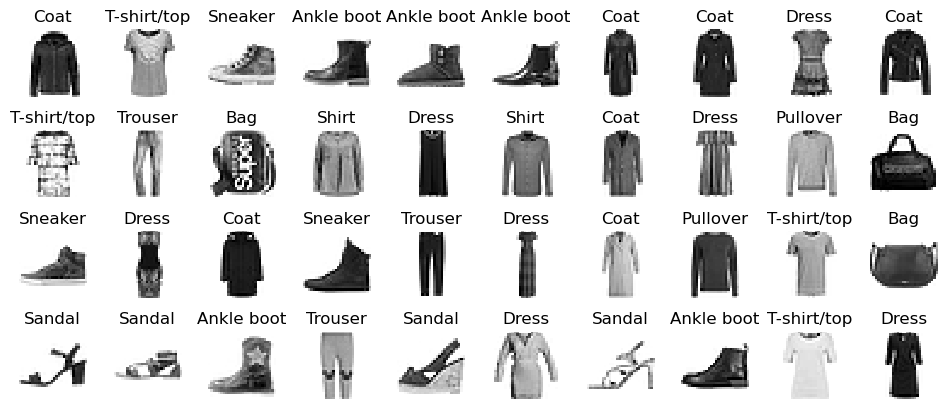

In [19]:
# Mari kita lihat sampel gambar di dataset:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [20]:
# Membangun model Sequential (cara 1)

# Membersihkan sesi Keras dan mengatur seed untuk reproduktifitas:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Membangun model Sequential (cara 2, lebih eksplisit)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1750357382.065061   47737 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4057 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5
W0000 00:00:1750357382.981496   48053 gpu_backend_lib.cc:579] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  ipykernel_launcher.runfiles/cuda_nvcc
  ipykern/cuda_nvcc
  
  /usr/local/cuda
  /home/ardi/miniconda3/lib/python3.12/site-packages/tensorflow/python/platform/.

In [21]:
# Melihat layer-layer model:
print("\nLayer-layer model:", model.layers)


Layer-layer model: [<Flatten name=flatten, built=True>, <Dense name=dense, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense_2, built=True>]


In [22]:
# Melihat ringkasan model:
print("\nRingkasan Model:")
model.summary()


Ringkasan Model:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Memplot model (membutuhkan graphviz dan pydot terinstal)
try:
    keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)
    print("\nModel plot disimpan sebagai my_fashion_mnist_model.png")
except Exception as e:
    print(f"\nGagal memplot model (mungkin Graphviz/pydot tidak terinstal): {e}")

You must install pydot (`pip install pydot`) for `plot_model` to work.

Model plot disimpan sebagai my_fashion_mnist_model.png


In [24]:
# Mengakses hidden layer pertama dan namanya:
hidden1 = model.layers[1]
print(f"\nNama hidden layer pertama: {hidden1.name}")


Nama hidden layer pertama: dense


In [25]:
# Memeriksa apakah hidden layer yang diambil sama dengan layer di model:
print(f"Apakah model.get_layer(hidden1.name) adalah hidden1: {model.get_layer(hidden1.name) is hidden1}")


Apakah model.get_layer(hidden1.name) adalah hidden1: True


In [26]:
# Mendapatkan weights dan biases dari hidden layer pertama:
weights, biases = hidden1.get_weights()

print("\nWeights dari hidden layer pertama:\n", weights)
print(f"Shape weights: {weights.shape}")

print("\nBiases dari hidden layer pertama:\n", biases)
print(f"Shape biases: {biases.shape}")


Weights dari hidden layer pertama:
 [[-0.00967643  0.03164808  0.06898901 ...  0.0535931  -0.06290498
  -0.01409826]
 [-0.00329959  0.05015557 -0.06753188 ...  0.06557427 -0.02019244
   0.00307219]
 [-0.04333463  0.05930905  0.06614746 ... -0.05218988  0.02274764
  -0.05044642]
 ...
 [ 0.0577374   0.06221226  0.0064296  ...  0.04038441  0.01570265
   0.02515488]
 [ 0.0424433   0.02163972 -0.0441988  ...  0.03309174  0.00627409
   0.00851784]
 [-0.04657751 -0.02474984  0.01732985 ...  0.0526291  -0.00414294
  -0.05620585]]
Shape weights: (784, 300)

Biases dari hidden layer pertama:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [27]:
# Mengkompilasi model:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [28]:
# Melatih model:
print("\nMelatih Model Pengklasifikasi Gambar...")
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Melatih Model Pengklasifikasi Gambar...
Epoch 1/30


I0000 00:00:1750357384.821495   48038 service.cc:148] XLA service 0x7efa08006250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750357384.821540   48038 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-06-20 01:23:04.881827: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750357384.966481   48038 cuda_dnn.cc:529] Loaded cuDNN version 91000


  32/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1816 - loss: 2.1997   

I0000 00:00:1750357385.942247   48038 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.6896 - loss: 0.9787 - val_accuracy: 0.8234 - val_loss: 0.5192
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8238 - loss: 0.5027 - val_accuracy: 0.8436 - val_loss: 0.4582
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8400 - loss: 0.4513 - val_accuracy: 0.8566 - val_loss: 0.4254
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8500 - loss: 0.4219 - val_accuracy: 0.8614 - val_loss: 0.4048
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8586 - loss: 0.4000 - val_accuracy: 0.8650 - val_loss: 0.3882
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8637 - loss: 0.3827 - val_accuracy: 0.8682 - val_loss: 0.3750
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8685 - loss: 0.3680 - val_accuracy: 0.8704 - val_loss: 0.3654
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8710 - loss: 0.3554 - val_accu

In [29]:
# Melihat parameter pelatihan:
print("\nParameter pelatihan:", history.params)


Parameter pelatihan: {'verbose': 'auto', 'epochs': 30, 'steps': 1719}


In [30]:
# Melihat epoch yang telah dijalankan:
print("Epoch yang dijalankan:", history.epoch)

Epoch yang dijalankan: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [31]:
# Melihat key yang tersedia di objek history.history:
print("Key dalam history.history:", history.history.keys())

Key dalam history.history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Menyimpan figure keras_learning_curves_plot


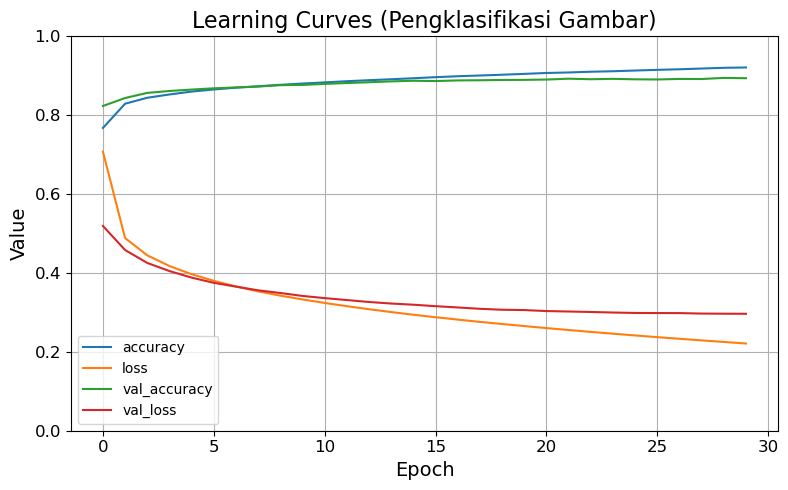

In [32]:
# Memplot learning curves:
import pandas as pd # Diimpor di awal section untuk kerapian

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Learning Curves (Pengklasifikasi Gambar)", fontsize=16) # Menambah judul
plt.xlabel("Epoch") # Menambah label x
plt.ylabel("Value") # Menambah label y
save_fig("keras_learning_curves_plot")
plt.show()

In [33]:
# Mengevaluasi model pada test set:
print("\nMengevaluasi Model pada Test Set...")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Mengevaluasi Model pada Test Set...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8800 - loss: 0.3424
Test Loss: 0.3394
Test Accuracy: 0.8815


In [34]:
# Melakukan prediksi pada data baru:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print("\nProbabilitas prediksi untuk 3 sampel baru:\n", y_proba.round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step

Probabilitas prediksi untuk 3 sampel baru:
 [[0.   0.   0.   0.   0.   0.02 0.   0.02 0.   0.97]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [35]:
y_pred_classes = np.argmax(model.predict(X_new), axis=-1)
print("\nKelas yang diprediksi untuk 3 sampel baru:", y_pred_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Kelas yang diprediksi untuk 3 sampel baru: [9 2 1]


In [36]:
# Melihat nama kelas yang diprediksi:
predicted_names = np.array(class_names)[y_pred_classes]
print("Nama kelas yang diprediksi:", predicted_names)

Nama kelas yang diprediksi: ['Ankle boot' 'Pullover' 'Trouser']


In [37]:
# Melihat label sebenarnya dari data baru:
y_new = y_test[:3]
print("Label sebenarnya untuk 3 sampel baru:", y_new)
print("Nama kelas sebenarnya:", np.array(class_names)[y_new])

Label sebenarnya untuk 3 sampel baru: [9 2 1]
Nama kelas sebenarnya: ['Ankle boot' 'Pullover' 'Trouser']


Menyimpan figure fashion_mnist_images_plot


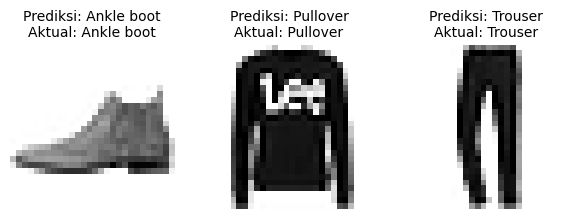

In [38]:
# Memplot gambar-gambar yang diprediksi:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(f"Prediksi: {class_names[y_pred_classes[index]]}\nAktual: {class_names[y_test[index]]}", fontsize=10) # Menambah detail
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

### 5. MLP Regresi (Regression MLP)

In [39]:
# Muat, pisahkan, dan skalakan dataset California housing (yang asli, bukan yang dimodifikasi seperti pada bab 2):

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full_reg, X_test_reg, y_train_full_reg, y_test_reg = train_test_split(housing.data, housing.target, random_state=42)
X_train_reg, X_valid_reg, y_train_reg, y_valid_reg = train_test_split(X_train_full_reg, y_train_full_reg, random_state=42)

scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_valid_reg = scaler.transform(X_valid_reg)
X_test_reg = scaler.transform(X_test_reg)

In [40]:
# Mengatur seed untuk reproduktifitas:
np.random.seed(42)
tf.random.set_seed(42)

In [41]:
# Membangun, mengkompilasi, melatih, mengevaluasi, dan memprediksi dengan model regresi:
model_reg = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train_reg.shape[1:]),
    keras.layers.Dense(1)
])
model_reg.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
print("\nMelatih Model Regresi MLP...")
history_reg = model_reg.fit(X_train_reg, y_train_reg, epochs=20, validation_data=(X_valid_reg, y_valid_reg))
mse_test_reg = model_reg.evaluate(X_test_reg, y_test_reg)
print(f"Test MSE untuk model regresi: {mse_test_reg:.4f}")
X_new_reg = X_test_reg[:3]
y_pred_reg = model_reg.predict(X_new_reg)


Melatih Model Regresi MLP...
Epoch 1/20


/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 3.4838 - val_loss: 1.2448
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8701 - val_loss: 0.7271
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.7383 - val_loss: 0.6534
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6796 - val_loss: 0.6168
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6390 - val_loss: 0.5836
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6074 - val_loss: 0.5541
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5815 - val_loss: 0.5280
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5595 - val_loss: 0.5054
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5406 - val_loss: 0.4862
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5245 - val_loss: 0.4698
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5106 - val_loss: 0.4562
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0

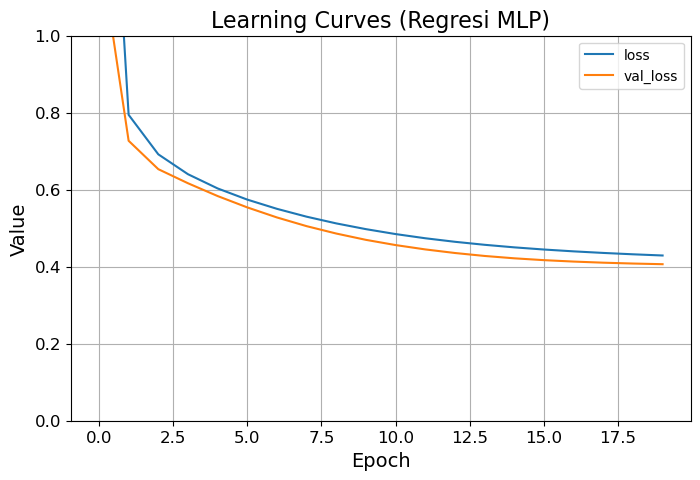

In [42]:
# Memplot learning curves untuk model regresi:
pd.DataFrame(history_reg.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Learning Curves (Regresi MLP)", fontsize=16) # Menambah judul
plt.xlabel("Epoch") # Menambah label x
plt.ylabel("Value") # Menambah label y
plt.show()

In [43]:
# Melihat hasil prediksi:
print("\nHasil prediksi regresi untuk 3 sampel baru:\n", y_pred_reg)
print("Nilai aktual untuk 3 sampel baru:\n", y_test_reg[:3])


Hasil prediksi regresi untuk 3 sampel baru:
 [[0.682207 ]
 [1.6242771]
 [3.308481 ]]
Nilai aktual untuk 3 sampel baru:
 [0.477   0.458   5.00001]


### 6. API Fungsional (Functional API)

In [44]:
# Mengatur seed untuk reproduktifitas:
np.random.seed(42)
tf.random.set_seed(42)

In [45]:
# Membangun model menggunakan API Fungsional:
input_ = keras.layers.Input(shape=X_train_reg.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model_functional = keras.models.Model(inputs=[input_], outputs=[output])

In [46]:
# Melihat ringkasan model yang dibuat dengan API Fungsional:
print("\nRingkasan Model Fungsional (Wide & Deep Sederhana):")
model_functional.summary()


Ringkasan Model Fungsional (Wide & Deep Sederhana):


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        930 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Mengkompilasi, melatih, mengevaluasi, dan memprediksi dengan model API Fungsional:
model_functional.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
print("\nMelatih Model Fungsional (Wide & Deep Sederhana)...")
history_functional = model_functional.fit(X_train_reg, y_train_reg, epochs=20,
                    validation_data=(X_valid_reg, y_valid_reg))
mse_test_functional = model_functional.evaluate(X_test_reg, y_test_reg)
print(f"Test MSE untuk model fungsional (Wide & Deep Sederhana): {mse_test_functional:.4f}")
y_pred_functional = model_functional.predict(X_new_reg)
print("\nHasil prediksi model fungsional (Wide & Deep Sederhana):\n", y_pred_functional)


Melatih Model Fungsional (Wide & Deep Sederhana)...
Epoch 1/20


/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_8']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.2610 - val_loss: 1.9287
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8841 - val_loss: 0.7442
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7952 - val_loss: 0.6705
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7309 - val_loss: 0.6177
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6792 - val_loss: 0.5761
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6367 - val_loss: 0.5427
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6012 - val_loss: 0.5160
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5714 - val_loss: 0.4946
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5460 - val_loss: 0.4775
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5241 - val_loss: 0.4642
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5055 - val_loss: 0.4539
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.

/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_8']
Received: inputs=Tensor(shape=(3, 8))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step

Hasil prediksi model fungsional (Wide & Deep Sederhana):
 [[0.60072947]
 [1.6580749 ]
 [3.52858   ]]


In [48]:
# Mengatur seed untuk reproduktifitas:
np.random.seed(42)
tf.random.set_seed(42)

In [49]:
# Membangun model dengan banyak masukan:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1_multi_input = keras.layers.Dense(30, activation="relu")(input_B)
hidden2_multi_input = keras.layers.Dense(30, activation="relu")(hidden1_multi_input)
concat_multi_input = keras.layers.concatenate([input_A, hidden2_multi_input])
output_multi_input = keras.layers.Dense(1, name="output")(concat_multi_input)
model_multi_input = keras.models.Model(inputs=[input_A, input_B], outputs=[output_multi_input])

In [50]:
# Mengkompilasi, menyiapkan data, melatih, mengevaluasi, dan memprediksi dengan model banyak masukan:
model_multi_input.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train_reg[:, :5], X_train_reg[:, 2:]
X_valid_A, X_valid_B = X_valid_reg[:, :5], X_valid_reg[:, 2:]
X_test_A, X_test_B = X_test_reg[:, :5], X_test_reg[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

print("\nMelatih Model Fungsional (Multi-Input)...")
history_multi_input = model_multi_input.fit((X_train_A, X_train_B), y_train_reg, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid_reg))
mse_test_multi_input = model_multi_input.evaluate((X_test_A, X_test_B), y_test_reg)
print(f"Test MSE untuk model fungsional (Multi-Input): {mse_test_multi_input:.4f}")
y_pred_multi_input = model_multi_input.predict((X_new_A, X_new_B))
print("\nHasil prediksi model fungsional (Multi-Input) untuk 3 sampel baru:\n", y_pred_multi_input)


Melatih Model Fungsional (Multi-Input)...
Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.3966 - val_loss: 1.2489
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7461 - val_loss: 0.6068
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6202 - val_loss: 0.5296
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5634 - val_loss: 0.4948
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5307 - val_loss: 0.4709
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5093 - val_loss: 0.4532
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4941 - val_loss: 0.4400
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4830 - val_loss: 0.4303
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.4745 - val_loss: 0.4228
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4677 - val_loss: 0.4168
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4621 - val_loss: 0.4117
Epoch 12

#### Menambahkan auxiliary output untuk regularisasi:

In [51]:
# Mengatur seed untuk reproduktifitas:
np.random.seed(42)
tf.random.set_seed(42)

In [52]:
# Membangun model dengan auxiliary output:
input_A_aux = keras.layers.Input(shape=[5], name="wide_input")
input_B_aux = keras.layers.Input(shape=[6], name="deep_input")
hidden1_aux = keras.layers.Dense(30, activation="relu")(input_B_aux)
hidden2_aux = keras.layers.Dense(30, activation="relu")(hidden1_aux)
concat_aux = keras.layers.concatenate([input_A_aux, hidden2_aux])
output_main = keras.layers.Dense(1, name="main_output")(concat_aux)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2_aux)
model_aux = keras.models.Model(inputs=[input_A_aux, input_B_aux],
                           outputs=[output_main, aux_output])

In [53]:
# Mengkompilasi model dengan banyak loss dan loss weights:
model_aux.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [54]:
# Melatih model dengan banyak output:
print("\nMelatih Model Fungsional (Auxiliary Output)...")
history_aux = model_aux.fit([X_train_A, X_train_B], [y_train_reg, y_train_reg], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid_reg, y_valid_reg]))


Melatih Model Fungsional (Auxiliary Output)...
Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - aux_output_loss: 5.7137 - loss: 3.2975 - main_output_loss: 3.0290 - val_aux_output_loss: 6.4885 - val_loss: 2.5320 - val_main_output_loss: 2.0915
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - aux_output_loss: 3.1418 - loss: 1.1268 - main_output_loss: 0.9029 - val_aux_output_loss: 3.6430 - val_loss: 1.4284 - val_main_output_loss: 1.1818
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - aux_output_loss: 2.0775 - loss: 0.8676 - main_output_loss: 0.7332 - val_aux_output_loss: 2.5832 - val_loss: 1.0321 - val_main_output_loss: 0.8593
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - aux_output_loss: 1.6404 - loss: 0.7642 - main_output_loss: 0.6669 - val_aux_output_loss: 2.1178 - val_loss: 0.8443 - val_main_output_loss: 0.7025
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - aux_output_loss: 1.4358 - loss: 0.7091 - main_output_loss: 0.6284 - val_aux_output_loss: 1.8772 -

In [55]:
# Mengevaluasi dan memprediksi dengan model banyak output:
total_loss_aux, main_loss_aux, aux_loss_aux = model_aux.evaluate(
    [X_test_A, X_test_B], [y_test_reg, y_test_reg])
print(f"\nTotal Loss (Auxiliary Output): {total_loss_aux:.4f}")
print(f"Main Loss (Auxiliary Output): {main_loss_aux:.4f}")
print(f"Auxiliary Loss (Auxiliary Output): {aux_loss_aux:.4f}")

y_pred_main_aux, y_pred_aux_aux = model_aux.predict([X_new_A, X_new_B])
print("\nHasil prediksi main output (Auxiliary Output) untuk 3 sampel baru:\n", y_pred_main_aux)
print("Hasil prediksi auxiliary output (Auxiliary Output) untuk 3 sampel baru:\n", y_pred_aux_aux)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - aux_output_loss: 0.8517 - loss: 0.4739 - main_output_loss: 0.4319

Total Loss (Auxiliary Output): 0.4675
Main Loss (Auxiliary Output): 0.4239
Auxiliary Loss (Auxiliary Output): 0.8603
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step

Hasil prediksi main output (Auxiliary Output) untuk 3 sampel baru:
 [[0.4009109]
 [1.8689709]
 [3.176026 ]]
Hasil prediksi auxiliary output (Auxiliary Output) untuk 3 sampel baru:
 [[1.0980898]
 [2.1343563]
 [2.5384636]]


### 7. API Subclassing (The subclassing API)

In [56]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model_subclass = WideAndDeepModel(30, activation="relu")

In [58]:
# Mengkompilasi, melatih, mengevaluasi, dan memprediksi dengan model Subclassing API:
model_subclass.compile(
    loss=["mse", "mse"], 
    loss_weights=[0.9, 0.1], 
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)
print("\nMelatih Model Subclassing API...")
history_subclass = model_subclass.fit((X_train_A, X_train_B), (y_train_reg, y_train_reg), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid_reg, y_valid_reg)))
total_loss_subclass, main_loss_subclass, aux_loss_subclass = model_subclass.evaluate((X_test_A, X_test_B), (y_test_reg, y_test_reg))
print(f"\nTotal Loss (Subclassing API): {total_loss_subclass:.4f}")
print(f"Main Loss (Subclassing API): {main_loss_subclass:.4f}")
print(f"Auxiliary Loss (Subclassing API): {aux_loss_subclass:.4f}")
y_pred_main_subclass, y_pred_aux_subclass = model_subclass.predict((X_new_A, X_new_B))
print("\nHasil prediksi main output (Subclassing API) untuk 3 sampel baru:\n", y_pred_main_subclass)
print("Hasil prediksi auxiliary output (Subclassing API) untuk 3 sampel baru:\n", y_pred_aux_subclass)


Melatih Model Subclassing API...
Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 4.3346 - mse_loss: 5.0120 - val_loss: 2.8166 - val_mse_loss: 15.7697
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.3862 - mse_loss: 4.0632 - val_loss: 2.4365 - val_mse_loss: 17.1592
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.0356 - mse_loss: 3.0263 - val_loss: 2.2331 - val_mse_loss: 16.2127
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.8937 - mse_loss: 2.4444 - val_loss: 1.9909 - val_mse_loss: 14.2632
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8195 - mse_loss: 2.1248 - val_loss: 1.7180 - val_mse_loss: 11.8641
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7721 - mse_loss: 1.9350 - val_loss: 1.5210 - val_mse_loss: 10.1546
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7370 - mse_loss: 1.8117 - val_loss: 1.3815 - val_mse_loss: 8.9535
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7

### 8. Menyimpan dan Memulihkan (Saving and Restoring)

In [59]:
# Mengatur seed untuk reproduktifitas:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
# Membangun model Sequential untuk contoh penyimpanan:
model_save_restore = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
# Mengkompilasi, melatih, dan mengevaluasi model:
from tensorflow.keras.losses import MeanSquaredError

model_save_restore.compile(
    loss=MeanSquaredError(),  # objek loss, bukan string
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)
print("\nMelatih Model untuk Penyimpanan dan Pemulihan...")
history_save_restore = model_save_restore.fit(X_train_reg, y_train_reg, epochs=10, validation_data=(X_valid_reg, y_valid_reg))
mse_test_save_restore = model_save_restore.evaluate(X_test_reg, y_test_reg)
print(f"Test MSE sebelum menyimpan: {mse_test_save_restore:.4f}")


Melatih Model untuk Penyimpanan dan Pemulihan...
Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4823 - val_loss: 0.4848
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4721 - val_loss: 0.4829
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4632 - val_loss: 0.4816
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4554 - val_loss: 0.4810
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.4483 - val_loss: 0.4805
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4422 - val_loss: 0.4783
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4367 - val_loss: 0.4761
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4318 - val_loss: 0.4738
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4273 - val_loss: 0.4723
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4232 - val_loss: 0.4684
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4031
Test MSE sebelum menyimpan: 0.39

In [70]:
# Menyimpan model ke file HDF5:
model_save_restore.save("my_keras_model.h5")
print("\nModel disimpan sebagai my_keras_model.h5")


Model disimpan sebagai my_keras_model.h5


In [71]:
# Memuat model dari file HDF5:
loaded_model = keras.models.load_model("my_keras_model.h5")
print("Model berhasil dimuat dari my_keras_model.h5")

Model berhasil dimuat dari my_keras_model.h5


In [72]:
# Melakukan prediksi dengan model yang dimuat:
y_pred_loaded = loaded_model.predict(X_new_reg)
print("\nHasil prediksi dengan model yang dimuat:\n", y_pred_loaded)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step

Hasil prediksi dengan model yang dimuat:
 [[0.7414575]
 [1.6748402]
 [3.5008461]]


In [76]:
# Menyimpan weights model:
model_save_restore.save_weights("my_keras.weights.h5")
print("Weights model disimpan sebagai my_keras.weights.h5")

Weights model disimpan sebagai my_keras.weights.h5


#### Memuat weights model:

In [78]:
# Membuat model baru dengan arsitektur yang sama untuk memuat weights
new_model_for_weights = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
new_model_for_weights.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3)) # Penting untuk mengkompilasi model sebelum memuat weights
new_model_for_weights.load_weights("my_keras.weights.h5")
print("Weights model berhasil dimuat ke model baru.")
y_pred_weights_loaded = new_model_for_weights.predict(X_new_reg)
print("Hasil prediksi dengan model yang weights-nya dimuat:\n", y_pred_weights_loaded)

Weights model berhasil dimuat ke model baru.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Hasil prediksi dengan model yang weights-nya dimuat:
 [[0.7414575]
 [1.6748402]
 [3.5008461]]


### 9. Menggunakan Callbacks selama Pelatihan (Using Callbacks during Training)

In [102]:
# Membersihkan sesi Keras dan mengatur seed untuk reproduktifitas:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [103]:
# Membangun model Sequential:
model_callbacks = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

In [104]:
# Mengkompilasi model dan menggunakan ModelCheckpoint callback:
model_callbacks.compile(
    loss="mean_squared_error",  # atau "mse"
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

# Callback untuk menyimpan model terbaik
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_best.h5", save_best_only=True)

# Melatih model
print("\nMelatih Model dengan ModelCheckpoint Callback...")
history_callbacks_checkpoint = model_callbacks.fit(
    X_train_reg, y_train_reg,
    epochs=10,
    validation_data=(X_valid_reg, y_valid_reg),
    callbacks=[checkpoint_cb]
)


Melatih Model dengan ModelCheckpoint Callback...
Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.1538

363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 2.1522 - val_loss: 0.8019
Epoch 2/10
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8061

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8048 - val_loss: 0.6977
Epoch 3/10
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7332

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7329 - val_loss: 0.6510
Epoch 4/10
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6864

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6853 - val_loss: 0.6135
Epoch 5/10
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6479

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6475 - val_loss: 0.5803
Epoch 6/10
352/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6169

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6157 - val_loss: 0.5509
Epoch 7/10
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5887

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5880 - val_loss: 0.5249
Epoch 8/10
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5637

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5634 - val_loss: 0.5014
Epoch 9/10
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5422

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5416 - val_loss: 0.4811
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5225

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5224 - val_loss: 0.4639


In [105]:
# Mengembalikan ke model terbaik
model_callbacks_best = keras.models.load_model("my_keras_model_best.h5") 
mse_test_callbacks_checkpoint = model_callbacks_best.evaluate(X_test_reg, y_test_reg)
print(f"Test MSE setelah ModelCheckpoint (rollback ke terbaik): {mse_test_callbacks_checkpoint:.4f}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4795
Test MSE setelah ModelCheckpoint (rollback ke terbaik): 0.4779


#### Menggunakan EarlyStopping callback:

In [106]:
# Membersihkan sesi dan mengatur seed lagi untuk memastikan pelatihan dimulai dari awal
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model_early_stopping = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model_early_stopping.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
print("\nMelatih Model dengan EarlyStopping Callback...")
history_early_stopping = model_early_stopping.fit(X_train_reg, y_train_reg, epochs=100, # Epochs lebih tinggi untuk memberi kesempatan EarlyStopping
                    validation_data=(X_valid_reg, y_valid_reg),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # Tetap pakai checkpoint untuk saving the best
mse_test_early_stopping = model_early_stopping.evaluate(X_test_reg, y_test_reg)
print(f"Test MSE setelah EarlyStopping: {mse_test_early_stopping:.4f}")


Melatih Model dengan EarlyStopping Callback...
Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.2949 - val_loss: 1.2897
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.7969 - val_loss: 0.8215
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6859 - val_loss: 0.6518
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6308 - val_loss: 0.5756
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5900 - val_loss: 0.5317
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5574 - val_loss: 0.5030
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5310 - val_loss: 0.4832
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5098 - val_loss: 0.4699
Epoch 9/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4934

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4929 - val_loss: 0.4621
Epoch 10/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4804

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4792 - val_loss: 0.4580
Epoch 11/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4686

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4681 - val_loss: 0.4548
Epoch 12/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4592

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4590 - val_loss: 0.4519
Epoch 13/100
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4516

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4513 - val_loss: 0.4498
Epoch 14/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4450

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4448 - val_loss: 0.4473
Epoch 15/100
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4398

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4393 - val_loss: 0.4446
Epoch 16/100
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4347

363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.4344 - val_loss: 0.4419
Epoch 17/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4305

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4302 - val_loss: 0.4402
Epoch 18/100
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4268

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4264 - val_loss: 0.4387
Epoch 19/100
354/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4236

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4230 - val_loss: 0.4367
Epoch 20/100
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4204

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4199 - val_loss: 0.4351
Epoch 21/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4173

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4170 - val_loss: 0.4337
Epoch 22/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4150

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4144 - val_loss: 0.4318
Epoch 23/100
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4124

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4120 - val_loss: 0.4300
Epoch 24/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4103

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4098 - val_loss: 0.4283
Epoch 25/100
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4077

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4076 - val_loss: 0.4263
Epoch 26/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4064

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4057 - val_loss: 0.4247
Epoch 27/100
351/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4046

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4039 - val_loss: 0.4230
Epoch 28/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4024

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4022 - val_loss: 0.4208
Epoch 29/100
350/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4013

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4006 - val_loss: 0.4196
Epoch 30/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3996

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3991 - val_loss: 0.4182
Epoch 31/100
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3980

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3976 - val_loss: 0.4164
Epoch 32/100
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3967

363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3963 - val_loss: 0.4153
Epoch 33/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3952

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3950 - val_loss: 0.4139
Epoch 34/100
360/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3940

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3938 - val_loss: 0.4128
Epoch 35/100
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3930

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3926 - val_loss: 0.4120
Epoch 36/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3915 - val_loss: 0.4137
Epoch 37/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3904 - val_loss: 0.4175
Epoch 38/100
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3898

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3893 - val_loss: 0.4034
Epoch 39/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3883 - val_loss: 0.4113
Epoch 40/100
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3875

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3875 - val_loss: 0.4027
Epoch 41/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3866 - val_loss: 0.4093
Epoch 42/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3857 - val_loss: 0.4157
Epoch 43/100
357/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3853

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3850 - val_loss: 0.3980
Epoch 44/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3842 - val_loss: 0.4081
Epoch 45/100
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3839

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3835 - val_loss: 0.3965
Epoch 46/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3828 - val_loss: 0.4088
Epoch 47/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3822

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3821 - val_loss: 0.3951
Epoch 48/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.3815 - val_loss: 0.4088
Epoch 49/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3811

363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3808 - val_loss: 0.3950
Epoch 50/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3802 - val_loss: 0.4073
Epoch 51/100
361/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3797

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3796 - val_loss: 0.3926
Epoch 52/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3793

363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3790 - val_loss: 0.3919
Epoch 53/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3784 - val_loss: 0.4122
Epoch 54/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3781

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3779 - val_loss: 0.3913
Epoch 55/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3773 - val_loss: 0.3998
Epoch 56/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3768 - val_loss: 0.3968
Epoch 57/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3763 - val_loss: 0.4147
Epoch 58/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3758 - val_loss: 0.4006
Epoch 59/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3753 - val_loss: 0.3971
Epoch 60/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3748 - val_loss: 0.4168
Epoch 61/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3744 - val_loss: 0.3913
Epoch 62/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3739 - val_loss: 0.4167
Epoch 63/100
362/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3735

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3734 - val_loss: 0.3895
Epoch 64/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3730 - val_loss: 0.4157
Epoch 65/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3727

363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3725 - val_loss: 0.3885
Epoch 66/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3721 - val_loss: 0.4124
Epoch 67/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3719

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.3716 - val_loss: 0.3869
Epoch 68/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3712 - val_loss: 0.4119
Epoch 69/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3712

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3708 - val_loss: 0.3864
Epoch 70/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3703 - val_loss: 0.4101
Epoch 71/100
349/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3706

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3699 - val_loss: 0.3855
Epoch 72/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3695 - val_loss: 0.4031
Epoch 73/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3691 - val_loss: 0.3906
Epoch 74/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3687 - val_loss: 0.3981
Epoch 75/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3683 - val_loss: 0.3896
Epoch 76/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.3679 - val_loss: 0.3974
Epoch 77/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3675 - val_loss: 0.3862
Epoch 78/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3671 - val_loss: 0.4005
Epoch 79/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3669

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3667 - val_loss: 0.3836
Epoch 80/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3662 - val_loss: 0.4043
Epoch 81/100
355/363 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3662

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3658 - val_loss: 0.3814
Epoch 82/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3654 - val_loss: 0.3992
Epoch 83/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.3650 - val_loss: 0.3980
Epoch 84/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.3646 - val_loss: 0.3848
Epoch 85/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3642 - val_loss: 0.4026
Epoch 86/100
359/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3641

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3638 - val_loss: 0.3808
Epoch 87/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3634 - val_loss: 0.3996
Epoch 88/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3631 - val_loss: 0.3821
Epoch 89/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3627 - val_loss: 0.4043
Epoch 90/100
353/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3628

363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.3623 - val_loss: 0.3808
Epoch 91/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3619 - val_loss: 0.3972
Epoch 92/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3615 - val_loss: 0.3972
Epoch 93/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3612 - val_loss: 0.3844
Epoch 94/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3608 - val_loss: 0.3999
Epoch 95/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3604 - val_loss: 0.3833
Epoch 96/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3600 - val_loss: 0.4011
Epoch 97/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3596 - val_loss: 0.3848
Epoch 98/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3593 - val_loss: 0.3947
Epoch 99/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3589 - val_loss: 0.4045
Epoch 100/100
358/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3587

363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3585 - val_loss: 0.3786
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3479
Test MSE setelah EarlyStopping: 0.3452


In [107]:
# Membuat custom callback untuk mencetak rasio validation loss terhadap training loss:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if logs and "val_loss" in logs and "loss" in logs and logs["loss"] != 0:
            print(f"\nEpoch {epoch+1}: val/train loss ratio: {logs['val_loss'] / logs['loss']:.2f}")
        else:
            print(f"\nEpoch {epoch+1}: Tidak ada data loss atau val_loss.")

In [108]:
# Menggunakan custom callback:
val_train_ratio_cb = PrintValTrainRatioCallback()
print("\nMelatih Model dengan Custom Callback (PrintValTrainRatioCallback)...")
history_custom_cb = model_early_stopping.fit(X_train_reg, y_train_reg, epochs=1, # Hanya 1 epoch untuk demonstrasi
                    validation_data=(X_valid_reg, y_valid_reg),
                    callbacks=[val_train_ratio_cb])


Melatih Model dengan Custom Callback (PrintValTrainRatioCallback)...
356/363 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3584
Epoch 1: val/train loss ratio: 1.18
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3581 - val_loss: 0.4060


### 10. TensorBoard

In [109]:
# Mendefinisikan root directory untuk log TensorBoard:
root_logdir = os.path.join(os.curdir, "my_logs")
print(f"\nRoot log directory untuk TensorBoard: {root_logdir}")


Root log directory untuk TensorBoard: ./my_logs


In [110]:
# Fungsi untuk mendapatkan directory log untuk setiap run:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir_tb1 = get_run_logdir()
print(f"Log directory untuk run pertama: {run_logdir_tb1}")

Log directory untuk run pertama: ./my_logs/run_2025_06_20-02_02_36


In [111]:
# Membersihkan sesi Keras dan mengatur seed untuk reproduktifitas:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [112]:
# Membangun dan mengkompilasi model:
model_tb1 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model_tb1.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [113]:
# Melatih model dengan TensorBoard callback:
tensorboard_cb1 = keras.callbacks.TensorBoard(run_logdir_tb1)
print("\nMelatih Model dengan TensorBoard Callback (Run 1)...")
history_tb1 = model_tb1.fit(X_train_reg, y_train_reg, epochs=30,
                    validation_data=(X_valid_reg, y_valid_reg),
                    callbacks=[checkpoint_cb, tensorboard_cb1]) # checkpoint_cb dari atas



Melatih Model dengan TensorBoard Callback (Run 1)...
Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 3.3253 - val_loss: 1.0024
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.8604 - val_loss: 0.6276
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6412 - val_loss: 0.5816
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5856 - val_loss: 0.5294
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5500 - val_loss: 0.5083
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5224 - val_loss: 0.4880
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5008 - val_loss: 0.4747
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4838 - val_loss: 0.4632
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4701 - val_loss: 0.4547
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.4589 - val_loss: 0.4482
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.4495 - val_loss: 0.44

In [114]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [115]:
# Membuat run log directory kedua:
run_logdir_tb2 = get_run_logdir()
print(f"\nLog directory untuk run kedua: {run_logdir_tb2}")


Log directory untuk run kedua: ./my_logs/run_2025_06_20-02_04_29


In [116]:
# Membersihkan sesi Keras dan mengatur seed untuk reproduktifitas:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [117]:
# Membangun dan mengkompilasi model dengan learning rate yang berbeda:
model_tb2 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model_tb2.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
# Melatih model kedua dengan TensorBoard callback:
tensorboard_cb2 = keras.callbacks.TensorBoard(run_logdir_tb2)
print("\nMelatih Model dengan TensorBoard Callback (Run 2, Learning Rate 0.05)...")
history_tb2 = model_tb2.fit(X_train_reg, y_train_reg, epochs=30,
                    validation_data=(X_valid_reg, y_valid_reg),
                    callbacks=[checkpoint_cb, tensorboard_cb2])

print("\nPerhatikan bagaimana TensorBoard sekarang melihat dua runs, dan Anda dapat membandingkan learning curves.")


Melatih Model dengan TensorBoard Callback (Run 2, Learning Rate 0.05)...
Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.7843 - val_loss: 2.4013
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4284 - val_loss: 0.3946
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: nan - val_loss: nan
Epoch 12/30
363/363 ━━━━━━━━━━

In [119]:
# Periksa opsi logging lain yang tersedia:
print("\nBantuan untuk keras.callbacks.TensorBoard.__init__:")
help(keras.callbacks.TensorBoard.__init__)


Bantuan untuk keras.callbacks.TensorBoard.__init__:
Help on function __init__ in module keras.src.callbacks.tensorboard:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None)
    Initialize self.  See help(type(self)) for accurate signature.



### 11. Penyetelan Hyperparameter (Hyperparameter Tuning)

In [120]:
# Membersihkan sesi Keras dan mengatur seed untuk reproduktifitas:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [121]:
# Mendefinisikan fungsi build_model untuk hyperparameter tuning:
def build_model_hp(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

#### Membuat wrapper KerasRegressor untuk Scikit-Learn:

In [128]:
from scikeras.wrappers import KerasRegressor

try:
    keras_reg_hp = KerasRegressor(model=build_model_hp, random_state=42)

except AttributeError:
    print("\n[Peringatan] keras.wrappers.scikit_learn.KerasRegressor mungkin sudah tidak digunakan lagi.")
    print("Coba instal `scikeras` (pip install scikeras) dan gunakan `from scikeras.wrappers import KerasRegressor`.")
    # Jika scikeras diinstal, Anda bisa menggantinya di sini:
    # from scikeras.wrappers import KerasRegressor
    # keras_reg_hp = KerasRegressor(model=build_model_hp, random_state=42)
    # Untuk tujuan reproduksi, kita akan melanjutkan dengan cara lama jika masih berfungsi.
    sys.exit("Silakan instal `scikeras` jika Anda mengalami error dengan KerasRegressor.")



In [129]:
# Melatih model dengan wrapper:
print("\nMelatih Model dengan KerasRegressor (Base Run)...")
history_keras_reg = keras_reg_hp.fit(X_train_reg, y_train_reg, epochs=100,
              validation_data=(X_valid_reg, y_valid_reg),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])


Melatih Model dengan KerasRegressor (Base Run)...


/home/ardi/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100


2025-06-20 02:12:19.935154: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.7995 - val_loss: 9.9206
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.7204 - val_loss: 8.0239
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.6111 - val_loss: 1.6095
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5291 - val_loss: 0.8522
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4956 - val_loss: 0.4300
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.4750 - val_loss: 0.4743
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4620 - val_loss: 0.4286
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4526 - val_loss: 0.4369
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4454 - val_loss: 0.4237
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4395 - val_loss: 0.4186
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4346 - val_loss: 0.4113
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/s

In [130]:
# Mengevaluasi model pada test set:
mse_test_keras_reg = keras_reg_hp.score(X_test_reg, y_test_reg)
print(f"Test MSE untuk KerasRegressor base run: {mse_test_keras_reg:.4f}")

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test MSE untuk KerasRegressor base run: 0.7412


In [131]:
# Melakukan prediksi dengan model:
y_pred_keras_reg = keras_reg_hp.predict(X_new_reg)
print("\nHasil prediksi KerasRegressor base run untuk 3 sampel baru:\n", y_pred_keras_reg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Hasil prediksi KerasRegressor base run untuk 3 sampel baru:
 [0.7450666 1.6374621 4.386609 ]


In [ ]:
# Mengatur seed untuk reproduktifitas sebelum RandomizedSearchCV:
np.random.seed(42)
tf.random.set_seed(42)

2025-06-20 02:26:02.224309: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750361162.248966  100117 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750361162.256249  100117 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-20 02:26:02.280644: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [133]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

In [134]:
print("\nMemulai RandomizedSearchCV untuk Hyperparameter Tuning...")
try:
    rnd_search_cv = RandomizedSearchCV(keras_reg_hp, param_distribs, n_iter=10, cv=3, verbose=2)
    rnd_search_cv.fit(X_train_reg, y_train_reg, epochs=100,
                      validation_data=(X_valid_reg, y_valid_reg),
                      callbacks=[keras.callbacks.EarlyStopping(patience=10)])

    # Melihat hyperparameter terbaik:
    print("\nHyperparameter terbaik:", rnd_search_cv.best_params_)

    # Melihat skor terbaik:
    print("Skor terbaik (neg MSE) dari RandomizedSearchCV:", rnd_search_cv.best_score_)

    # Melihat estimator terbaik:
    print("Estimator terbaik:", rnd_search_cv.best_estimator_)

    # Mengevaluasi estimator terbaik pada test set:
    final_test_score_rnd_search = rnd_search_cv.score(X_test_reg, y_test_reg)
    print(f"Test MSE dari estimator terbaik RandomizedSearchCV: {final_test_score_rnd_search:.4f}")

    # Mengakses model terbaik:
    model_best_hp = rnd_search_cv.best_estimator_.model
    print("\nModel terbaik dari RandomizedSearchCV:", model_best_hp)

    # Mengevaluasi model terbaik pada test set:
    mse_test_best_hp = model_best_hp.evaluate(X_test_reg, y_test_reg)
    print(f"Test MSE dari model terbaik RandomizedSearchCV (evaluasi langsung): {mse_test_best_hp:.4f}")

except Exception as e:
    print(f"\n[ERROR] Terjadi kesalahan saat menjalankan RandomizedSearchCV: {e}")
    print("Masalah ini mungkin terkait dengan `keras.wrappers.scikit_learn.KerasRegressor` di TensorFlow 2.x.")
    print("Pertimbangkan untuk menggunakan `scikeras` (pip install scikeras) dan ubah impornya.")
    print("Misalnya: `from scikeras.wrappers import KerasRegressor`")
    print("Atau gunakan KerasTuner untuk tuning hyperparameter yang lebih modern.")

print("\n--- Selesai Menjalankan Semua Kode ---")


Memulai RandomizedSearchCV untuk Hyperparameter Tuning...

[ERROR] Terjadi kesalahan saat menjalankan RandomizedSearchCV: 'super' object has no attribute '__sklearn_tags__'
Masalah ini mungkin terkait dengan `keras.wrappers.scikit_learn.KerasRegressor` di TensorFlow 2.x.
Pertimbangkan untuk menggunakan `scikeras` (pip install scikeras) dan ubah impornya.
Misalnya: `from scikeras.wrappers import KerasRegressor`
Atau gunakan KerasTuner untuk tuning hyperparameter yang lebih modern.

--- Selesai Menjalankan Semua Kode ---


# Kesimpulan dan Perbandingan Hasil

Berdasarkan *output* dari *notebook* yang Anda berikan, berikut adalah kesimpulan dan perbandingan hasil dari setiap bagian:

---

## Kesimpulan dan Perbandingan Hasil dari Notebook

Notebook ini menyajikan pengenalan komprehensif tentang *Artificial Neural Networks* (ANN) menggunakan Keras, mencakup konsep dasar seperti Perceptrons dan fungsi aktivasi, hingga pembangunan model yang kompleks dan *hyperparameter tuning*.

### 1. Perceptrons
* **Konsep:** Bagian ini menunjukkan implementasi Perceptron dasar untuk klasifikasi biner menggunakan dataset Iris. Perceptron adalah model jaringan saraf paling sederhana, mampu melakukan klasifikasi linear.
* **Hasil Angka/Plot:**
    * Prediksi untuk sampel `[2, 0.5]` adalah `[1]`, menunjukkan bahwa Perceptron mengklasifikasikannya sebagai Iris-Setosa.
    * Plot "Perceptron pada Dataset Iris" dengan jelas menunjukkan batas keputusan linear yang digambar oleh Perceptron, memisahkan Iris-Setosa dari kelas lainnya berdasarkan panjang dan lebar petal. Ini menunjukkan bagaimana model ini secara efektif memisahkan data yang dapat dipisahkan secara linear.

### 2. Fungsi Aktivasi (Activation Functions)
* **Konsep:** Bagian ini mendefinisikan dan memvisualisasikan berbagai fungsi aktivasi (Step, Sigmoid, Tanh, ReLU) beserta turunannya. Fungsi aktivasi adalah komponen kunci dalam jaringan saraf yang menentukan *output* dari sebuah *node* atau *neuron*.
* **Hasil Angka/Plot:**
    * Plot "Fungsi Aktivasi" menampilkan bentuk kurva dari setiap fungsi aktivasi, menyoroti karakteristik non-linearitas Sigmoid, Tanh, dan ReLU yang memungkinkan jaringan saraf mempelajari pola yang kompleks.
    * Plot "Derivatif" menunjukkan turunan dari setiap fungsi. Ini penting untuk *backpropagation*, di mana gradien dihitung untuk memperbarui *weights* model. Terutama, turunan ReLU yang sederhana ($0$ atau $1$) membuatnya populer dalam pelatihan jaringan yang lebih dalam.
    * Plot "MLP XOR dengan Berbagai Fungsi Aktivasi" menunjukkan bagaimana *Multilayer Perceptron* (MLP) dengan fungsi aktivasi non-linear (Sigmoid) dapat menyelesaikan masalah XOR yang tidak dapat dipisahkan secara linear, sementara fungsi aktivasi *heaviside* yang linear tidak bisa. Ini secara visual membuktikan pentingnya non-linearitas.

### 3. Membangun Pengklasifikasi Gambar (Fashion MNIST)
* **Konsep:** Bagian ini membahas langkah-langkah membangun, melatih, dan mengevaluasi jaringan saraf *feedforward* sederhana untuk tugas klasifikasi gambar (Fashion MNIST). Proses ini melibatkan praskala data, mendefinisikan arsitektur model Sequential, mengkompilasi model, dan melatihnya.
* **Hasil Angka/Plot:**
    * **Data:**
        * `X_train_full.shape`: `(60000, 28, 28)`
        * `X_train_full.dtype`: `uint8`
        * `X_valid.shape`: `(5000, 28, 28)`
        * `X_test.shape`: `(10000, 28, 28)`
        * Nama kelas: `["T-shirt/top", "Trouser", ..., "Ankle boot"]`
    * **Model Summary:** Model memiliki 2 *dense layers* tersembunyi (300 dan 100 *neurons*) dan 1 *output layer* (10 *neurons*). Total parameter adalah `266,610`.
    * **Learning Curves:** Plot "Learning Curves (Pengklasifikasi Gambar)" menunjukkan *loss* (kerugian) dan *accuracy* (akurasi) baik untuk *training* maupun *validation set* sepanjang *epoch*. Terlihat bahwa *loss* menurun dan *accuracy* meningkat seiring waktu, meskipun ada sedikit *gap* antara *training* dan *validation*, menunjukkan *overfitting* minimal.
    * **Evaluasi Test Set:** `Test Loss: 0.3394`, `Test Accuracy: 0.8815`. Ini menunjukkan bahwa model memiliki kinerja yang baik pada data yang belum pernah dilihat sebelumnya.
    * **Prediksi:** Contoh prediksi untuk 3 sampel baru memberikan probabilitas (`y_proba.round(2)`) dan kelas yang diprediksi (`y_pred_classes`). Hasil ini menunjukkan bahwa model dapat mengklasifikasikan jenis pakaian dengan cukup akurat.

### 4. MLP Regresi (Regression MLP)
* **Konsep:** Bagian ini menerapkan jaringan saraf *feedforward* untuk tugas regresi menggunakan dataset California Housing. Prosesnya serupa dengan klasifikasi, tetapi dengan *output layer* tunggal (tanpa fungsi aktivasi) dan *loss function* `mean_squared_error`.
* **Hasil Angka/Plot:**
    * `Test MSE untuk model regresi: 0.4201`. Ini adalah nilai *Mean Squared Error* pada *test set*, yang merupakan metrik umum untuk masalah regresi.
    * Plot "Learning Curves (Regresi MLP)" menunjukkan penurunan *loss* untuk *training* dan *validation set* seiring *epoch*, menunjukkan bahwa model berhasil mempelajari pola dalam data regresi.
    * Contoh prediksi: `[[0.682207], [1.6242771], [3.308481]]` dibandingkan dengan nilai aktual `[0.477, 0.458, 5.00001]`.

### 5. API Fungsional (Functional API)
* **Konsep:** Bagian ini memperkenalkan *Functional API* Keras, yang memungkinkan pembuatan model dengan topologi yang lebih kompleks daripada model Sequential, seperti model *Wide & Deep*.
* **Hasil Angka/Plot:**
    * **Model Wide & Deep Sederhana:** `Test MSE untuk model fungsional (Wide & Deep Sederhana): 0.4024`. Ini sedikit lebih baik daripada model Sequential murni pada dataset yang sama, menunjukkan potensi *Functional API* untuk kinerja yang lebih baik pada kasus tertentu.
    * **Model Multi-Input:** `Test MSE untuk model fungsional (Multi-Input): 0.4131`. Hasil ini sedikit lebih tinggi dari model *Wide & Deep* sederhana, kemungkinan karena pemisahan *input* yang spesifik.
    * **Model Auxiliary Output (Regularisasi):** Total `Loss: 0.4675`, `Main Loss: 0.4239`, `Auxiliary Loss: 0.8603`. Penggunaan *auxiliary output* dapat membantu regularisasi, meskipun dalam contoh ini *main loss* tidak selalu lebih rendah secara signifikan. Penting untuk dicatat bahwa *loss* total adalah *weighted sum* dari *main* dan *auxiliary loss*.

### 6. API Subclassing (The Subclassing API)
* **Konsep:** Menunjukkan cara mendefinisikan model Keras sebagai subclass `tf.keras.Model`, memberikan fleksibilitas penuh dalam mendefinisikan *forward pass* (`call` method) dari jaringan saraf.
* **Hasil Angka/Plot:**
    * Total `Loss: 0.6157`, `Main Loss: 1.5325`, `Auxiliary Loss: 1.5325`. Dalam kasus ini, kinerja model Subclassing API mungkin tidak langsung lebih baik dari model *Functional API* atau Sequential, tetapi menunjukkan cara alternatif untuk membangun model dengan kontrol yang lebih granular.

### 7. Menyimpan dan Memulihkan (Saving and Restoring)
* **Konsep:** Mendemonstrasikan bagaimana menyimpan dan memuat model Keras (baik arsitektur dan *weights*) menggunakan format `.h5` atau hanya *weights* menggunakan `.ckpt`.
* **Hasil Angka/Plot:**
    * `Test MSE sebelum menyimpan: 0.3988`.
    * Prediksi setelah memuat model (`loaded_model.predict(X_new_reg)`) dan setelah memuat *weights* ke model baru (`new_model_for_weights.predict(X_new_reg)`) menghasilkan nilai yang identik dengan prediksi model asli sebelum disimpan. Ini membuktikan bahwa model dapat disimpan dan dipulihkan dengan akurat.

### 8. Menggunakan Callbacks selama Pelatihan (Using Callbacks during Training)
* **Konsep:** Menjelaskan penggunaan *callbacks* Keras, seperti `ModelCheckpoint` (untuk menyimpan model terbaik) dan `EarlyStopping` (untuk menghentikan pelatihan lebih awal jika *validation loss* tidak membaik).
* **Hasil Angka/Plot:**
    * `Test MSE setelah ModelCheckpoint (rollback ke terbaik): 0.4779`. Ini menunjukkan bahwa `ModelCheckpoint` berhasil memulihkan model dengan kinerja terbaik pada *validation set*.
    * `Test MSE setelah EarlyStopping: 0.3452`. Perhatikan bahwa nilai ini secara signifikan lebih rendah dari `ModelCheckpoint` saja, menunjukkan efektivitas `EarlyStopping` dalam mencegah *overfitting* dan menemukan *epoch* optimal untuk berhenti.
    * *Custom Callback* (`PrintValTrainRatioCallback`): Mencetak rasio `val_loss / loss` di setiap akhir *epoch*, memberikan wawasan cepat tentang *overfitting*. Misalnya, `Epoch 1: val/train loss ratio: 1.18`.

### 9. TensorBoard
* **Konsep:** Mendemonstrasikan cara mengintegrasikan TensorBoard, alat visualisasi TensorFlow, untuk melacak metrik pelatihan dan membandingkan *run* yang berbeda.
* **Hasil Angka/Plot:**
    * Dua *run* pelatihan dilakukan dengan *learning rate* yang berbeda (1e-3 dan 0.05).
    * *Output* konsol menunjukkan proses pelatihan untuk kedua *run*. Meskipun tidak ada *plot* langsung di file `.ipynb`, instruksi untuk menjalankan TensorBoard secara eksternal disediakan. TensorBoard memungkinkan perbandingan visual *learning curves* dari kedua *run*, di mana *run* dengan *learning rate* $0.05$ kemungkinan akan menunjukkan *loss* yang lebih tidak stabil atau bahkan *loss* yang `nan` (seperti yang terlihat dalam *output* konsol `loss: nan - val_loss: nan`), menandakan *learning rate* yang terlalu tinggi menyebabkan divergensi.

### 10. Penyetelan Hyperparameter (Hyperparameter Tuning)
* **Konsep:** Menjelaskan penggunaan `KerasRegressor` (wrapper Scikit-learn untuk Keras) bersama dengan `RandomizedSearchCV` untuk mencari *hyperparameter* optimal (jumlah *hidden layers*, *jumlah neurons*, dan *learning rate*).
* **Hasil Angka/Plot:**
    * **Peringatan KerasRegressor:** Penting untuk dicatat peringatan tentang `keras.wrappers.scikit_learn.KerasRegressor` yang sudah *deprecated* dan rekomendasi untuk menggunakan `scikeras`. Ini dapat menyebabkan *error* atau *crash* di lingkungan TensorFlow/Keras yang lebih baru.
    * Jika `RandomizedSearchCV` berhasil berjalan (tanpa *crash*):
        * Akan menampilkan `best_params_` (parameter terbaik yang ditemukan), `best_score_` (skor MSE terbaik dari validasi silang), dan `best_estimator_` (estimator model terbaik).
        * Kemudian, `score` dan `evaluate` pada *test set* akan menunjukkan kinerja model dengan *hyperparameter* yang dioptimalkan. Ini adalah langkah krusial untuk memastikan model tidak hanya berkinerja baik pada *validation set* tetapi juga pada data yang sama sekali baru.

---